In [ ]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
air_pollution = pd.read_csv('/content/drive/MyDrive/global air pollution dataset.csv')
air_pollution.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
cities = pd.read_csv('/content/drive/MyDrive/cities_c.csv')
cities.head()

,City Name,Country
0,Granville,France
1,Kingston Upon Hull,United Kingdom
2,New Waterford,Canada
3,Kingstown,Saint Vincent and the Grenadines
4,Nanakuli,United States


In [ ]:
countries_lat_long = pd.read_csv('/content/drive/MyDrive/countries_co-ord.csv')
countries_lat_long.head()

,country_code,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [ ]:
countries_lat_long.isnull().sum()

country_code    0
latitude        0
longitude       0
name            0
dtype: int64

In [ ]:
air_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [ ]:
air_pollution.shape

(23463, 12)

In [ ]:
air_pollution.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [ ]:
air_pollution_copy = air_pollution.copy()
air_pollution_copy.head(2)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good


In [ ]:
air_pollution.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [ ]:
air_pollution.duplicated().sum()

0

In [ ]:
air_pollution.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [ ]:
fig = px.histogram(air_pollution, x='AQI Value', nbins=5,color='AQI Category', title='Histogram of AQI Value', labels={'AQI Value': 'Value', 'count': 'Frequency'})
fig.update_layout(showlegend=True)
fig.show()

<Figure size 800x5000 with 0 Axes>

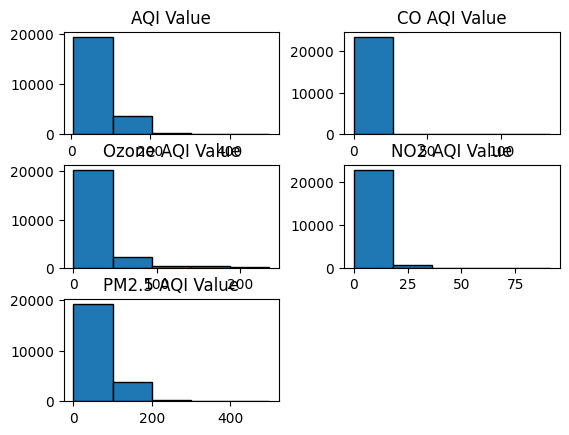

In [ ]:
plt.figure(figsize=(8, 50))
air_pollution.hist(bins=5, edgecolor='black', grid=False)
plt.title('Histogram of AQI Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
numeric_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
fig = sp.make_subplots(rows=len(numeric_columns), cols=1, subplot_titles=numeric_columns)
for i, column in enumerate(numeric_columns, 1):
    histogram = go.Histogram(x=air_pollution[column], name=column, marker_color='#1f77b4')
    fig.add_trace(histogram, row=i, col=1)
fig.update_layout(height=400 * len(numeric_columns), title_text='Histograms of Numeric Columns')
fig.show()


In [ ]:
air_pollution.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [ ]:
merged_df = pd.merge(air_pollution, cities, how='left', left_on='City', right_on='City Name')
air_pollution['Country'] = merged_df['Country_y'].fillna(air_pollution['Country'])

In [ ]:
air_pollution.dropna(subset=['City'], inplace=True)

In [ ]:
air_pollution.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [ ]:
air_pollution.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23462.000000,23462.000000,23462.000000,23462.000000,23462.000000
mean,72.011039,1.368383,35.193163,3.063294,68.519777
std,56.056409,1.832101,28.099198,5.254217,54.797611
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [ ]:
air_pollution.shape

(23462, 12)

In [ ]:
air_pollution.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,country_code,latitude,longitude
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,RF,61.524000,105.318800
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,BR,-14.235004,-51.925280
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,IT,41.871940,12.567380
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,PL,51.919438,19.145136
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,FR,46.227638,2.213749


In [ ]:
merge_columns = ['Country','name']
air_pollution = pd.merge(air_pollution, countries_lat_long[['country_code', 'latitude', 'longitude', 'name']],  left_on='Country', right_on='name', how='left')


In [ ]:
del air_pollution['name']

In [ ]:
air_pollution.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,country_code,latitude,longitude
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,RF,61.524000,105.318800
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,BR,-14.235004,-51.925280
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,IT,41.871940,12.567380
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,PL,51.919438,19.145136
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,FR,46.227638,2.213749


In [ ]:
countries_freq = air_pollution.groupby('Country')['AQI Value'].count().sort_values(ascending=False)
countries_freq.head(10)

Country
United States of America    2872
India                       2504
Brazil                      1594
Germany                     1345
Russian Federation          1241
Italy                       1028
France                       815
China                        799
Japan                        729
Mexico                       595
Name: AQI Value, dtype: int64

In [ ]:
columns_of_interest = ['AQI Value', 'NO2 AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value']
melted_df = air_pollution.melt(id_vars=['Country', 'City'], value_vars=columns_of_interest, var_name='Variable', value_name='Value')
fig = px.box(melted_df, x='Variable', y='Value', title='Box Plot of Air Quality Indices', labels={'Value': 'Air Quality Index'})
fig.show()


In [ ]:
aqi_category_mapping = {'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2, 'Unhealthy': 3, 'Very Unhealthy': 4, 'Hazardous': 5}
aqi_columns = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
air_pollution[aqi_columns] = air_pollution[aqi_columns].replace(aqi_category_mapping)
air_pollution.head()


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,country_code,latitude,longitude
0,Russian Federation,Praskoveya,51,1,1,0,36,0,0,0,51,1,RF,61.524000,105.318800
1,Brazil,Presidente Dutra,41,0,1,0,5,0,1,0,41,0,BR,-14.235004,-51.925280
2,Italy,Priolo Gargallo,66,1,1,0,39,0,2,0,66,1,IT,41.871940,12.567380
3,Poland,Przasnysz,34,0,1,0,34,0,0,0,20,0,PL,51.919438,19.145136
4,France,Punaauia,22,0,0,0,22,0,0,0,6,0,FR,46.227638,2.213749


In [ ]:
air_pollution.shape

(23462, 15)

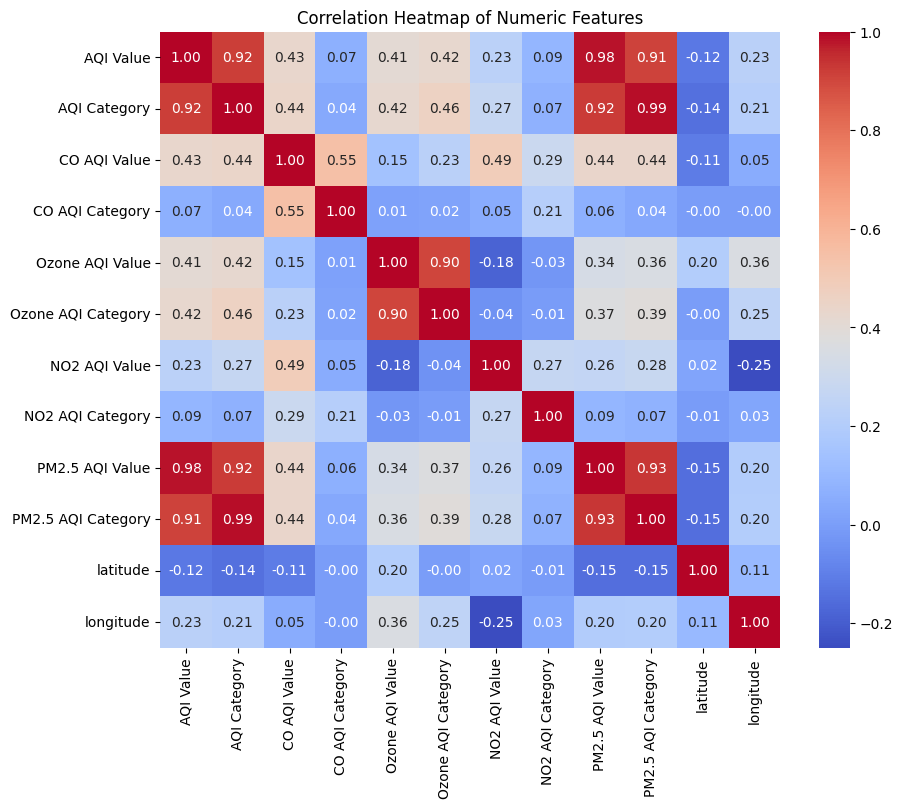

In [ ]:
correlation_matrix = air_pollution.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


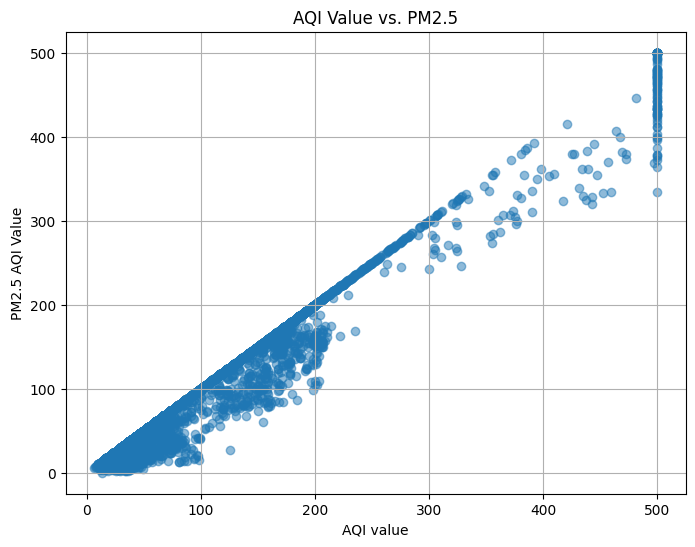

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(air_pollution['AQI Value'], air_pollution['PM2.5 AQI Value'], alpha=0.5)
plt.title('AQI Value vs. PM2.5')
plt.xlabel('AQI value')
plt.ylabel('PM2.5 AQI Value')
plt.grid(True)
plt.show()

In [ ]:
air_pollution_final = air_pollution
file_path = '/content/drive/MyDrive/air_pollution_final.csv'
air_pollution_final.to_csv(file_path, index=False)
print(f"file saved to: {file_path}")


file saved to: /content/drive/MyDrive/air_pollution_final.csv
